Analise melhores clientes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from classes.classdatabasemanager import DatabaseManager
from utils.logger_utils import logging

# classe DatabaseManager para poder acedar as tabelas
db_manager = DatabaseManager()

# tabelas carregadas em df
df_produtos = db_manager.fetch_data_to_df("SELECT * FROM produtos;")
df_clientes = db_manager.fetch_data_to_df("SELECT * FROM clientes;")
df_vendas = db_manager.fetch_data_to_df("SELECT * FROM vendas;")

# mostrar os primeiros 5 registos
display(df_produtos.head())
display(df_clientes.head())
display(df_vendas.head())

,ID_Produto,Nome_Produto,Categoria,Preço
0,1,rest,Roupas,380.64
1,2,next,Brinquedos,822.26
2,3,discuss,Móveis,220.27
3,4,professor,Alimentos,453.94
4,5,no,Alimentos,887.23


,ID_Cliente,Nome,Idade,Email,Telefone
0,1,Ronald Hamilton,74,jennifer93@hotmail.com,514.274.1458
1,2,David Rios,28,andersonlisa@yahoo.com,555-038-0266
2,3,Gary Bennett,75,amanda62@horn.com,+1-666-391-8179x0940
3,4,Terry Duffy,20,stephanie21@hotmail.com,087.472.1372
4,5,Erica Williams,24,qjohnson@yahoo.com,352.473.5798x132


,ID_Venda,ID_Cliente,ID_Produto,ID_Loja,ID_Atendente,Quantidade,Data
0,1,44,28,47,33,5,2020-06-15
1,2,17,4,24,28,3,2024-01-25
2,3,30,46,6,11,10,2021-06-28
3,4,24,38,25,9,7,2020-12-24
4,5,41,30,20,41,1,2024-01-23


In [2]:
# Juntar vendas com clientes
df_merged = df_vendas.merge(df_clientes, left_on="id_cliente", right_on="id")

# Juntar o resultado com produtos
df_merged = df_merged.merge(df_produtos, left_on="id_produto", right_on="id")

df_merged["Gasto Total"]=df_merged["preco"]*df_merged["quantidade"]
display(df_merged)



KeyError: 'id'

In [3]:
#cliente que mais gastou top 5
cliente_max=df_merged.groupby("nome_x")["Gasto Total"].sum().sort_values(ascending=False).reset_index()
cliente_max=cliente_max.rename(columns={"nome_x": "Cliente"})
display(cliente_max.head(5))

,Cliente,Gasto Total


In [4]:
#clientes que mais compraram top5
cliente_qt=df_merged.groupby("nome_x")["quantidade"].sum().sort_values(ascending=False).reset_index()
cliente_qt=cliente_qt.rename(columns={"nome_x": "Cliente"})
display(cliente_qt.head(5))

,Cliente,quantidade


In [5]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot

criar_graficos_matplotlib_pyplot(cliente_qt, "Top 5 Clientes Que Mais Compraram", "Nome do Cliente", "Compras Totais")

TypeError: no numeric data to plot

TypeError: 'module' object is not callable

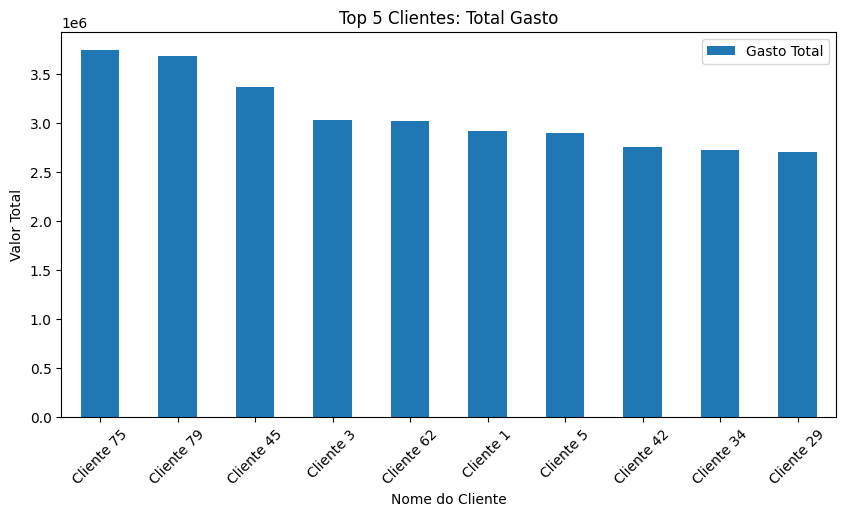

In [22]:
# Criar gráfico de barras
from utils.funcoes import criar_graficos_matplotlib_pyplot

criar_graficos_matplotlib_pyplot(cliente_max, "Top 5 Clientes: Total Gasto", "Nome do Cliente", "Valor Total")